In [1]:
!pip install pycaret

     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 102kB 5.6MB/s 
     |████████████████████████████████| 1.6MB 116kB/s 
     |████████████████████████████████| 63.9MB 54kB/s 
     |████████████████████████████████| 389kB 54.3MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 81kB 11.2MB/s 
     |████████████████████████████████| 3.0MB 41.1MB/s 
     |████████████████████████████████| 133kB 54.6MB/s 
     |████████████████████████████████| 7.0MB 43.6MB/s 
     |████████████████████████████████| 266kB 50.8MB/s 
     |████████████████████████████████| 1.2MB 36.3MB/s 
     |████████████████████████████████| 2.1MB 30.8MB/s 
     |████████████████████████████████| 552kB 43.4MB/s 
     |████████████████████████████████| 235kB 48.0MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 6.2MB 41.4MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
  

**Getting data from pycaret dataset**

In [0]:
from pycaret.datasets import get_data

In [5]:
diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
from pycaret.classification import *
exp1 = setup(diabetes, target = 'Class variable')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2338
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(768, 9)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.767100,0.816900,0.604100,0.687800,0.639400,0.469600
1,Gradient Boosting Classifier,0.755900,0.802400,0.609600,0.661400,0.630400,0.449800
2,Extra Trees Classifier,0.754000,0.797300,0.539800,0.687100,0.600000,0.427700
3,Extreme Gradient Boosting,0.752100,0.799800,0.604400,0.657500,0.626100,0.442300
4,Linear Discriminant Analysis,0.742900,0.791500,0.551200,0.654300,0.592100,0.408900
5,Ridge Classifier,0.741100,0.000000,0.540400,0.652600,0.585200,0.402000
6,Light Gradient Boosting Machine,0.739200,0.771400,0.572200,0.646000,0.603200,0.410700
7,Logistic Regression,0.735600,0.785900,0.530700,0.642700,0.572600,0.388000
8,Random Forest Classifier,0.735400,0.774200,0.502300,0.668100,0.566200,0.382700
9,Ada Boost Classifier,0.735400,0.767900,0.571900,0.641800,0.600100,0.404400


**BEFOR TUNNING**

In [8]:
adaboost = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7407,0.7639,0.6316,0.6316,0.6316,0.4316
1,0.7222,0.7880,0.5789,0.6111,0.5946,0.3836
2,0.7593,0.7865,0.6316,0.6667,0.6486,0.4658
3,0.7037,0.6835,0.4211,0.6154,0.5000,0.2998
4,0.8148,0.8541,0.5789,0.8462,0.6875,0.5624
5,0.7407,0.8113,0.5789,0.6471,0.6111,0.4176
6,0.7778,0.8135,0.6316,0.7059,0.6667,0.5008
7,0.7170,0.7587,0.6111,0.5789,0.5946,0.3774
8,0.7170,0.7206,0.4444,0.6154,0.5161,0.3234
9,0.6604,0.6984,0.6111,0.5000,0.5500,0.2816


In [9]:
type(adaboost)

sklearn.ensemble._weight_boosting.AdaBoostClassifier

In [11]:
adaboost.base_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 **AFTER TUNING**

In [12]:
tuned_adaboost = tune_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7593,0.7774,0.5789,0.6875,0.6286,0.4524
1,0.6852,0.7925,0.5263,0.5556,0.5405,0.3014
2,0.7593,0.8135,0.5789,0.6875,0.6286,0.4524
3,0.7037,0.7474,0.3684,0.6364,0.4667,0.2812
4,0.7778,0.8602,0.5789,0.7333,0.6471,0.4882
5,0.7222,0.8383,0.5263,0.6250,0.5714,0.3682
6,0.7963,0.8466,0.6316,0.7500,0.6857,0.5367
7,0.7358,0.8143,0.5000,0.6429,0.5625,0.3775
8,0.6981,0.7524,0.4444,0.5714,0.5000,0.2886
9,0.7547,0.8333,0.7778,0.6087,0.6829,0.4877


In [13]:
# creating a decision tree model
dt = create_model('dt')
# ensembling a trained dt model
dt_bagged = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7222,0.7970,0.6842,0.5909,0.6341,0.4122
1,0.7778,0.8008,0.6316,0.7059,0.6667,0.5008
2,0.7222,0.7271,0.5789,0.6111,0.5946,0.3836
3,0.7593,0.7090,0.4211,0.8000,0.5517,0.4081
4,0.8333,0.8835,0.6842,0.8125,0.7429,0.6209
5,0.7222,0.8105,0.5789,0.6111,0.5946,0.3836
6,0.7593,0.8579,0.5789,0.6875,0.6286,0.4524
7,0.6981,0.7421,0.5000,0.5625,0.5294,0.3083
8,0.6604,0.6595,0.2778,0.5000,0.3571,0.1512
9,0.7358,0.8278,0.7778,0.5833,0.6667,0.4552


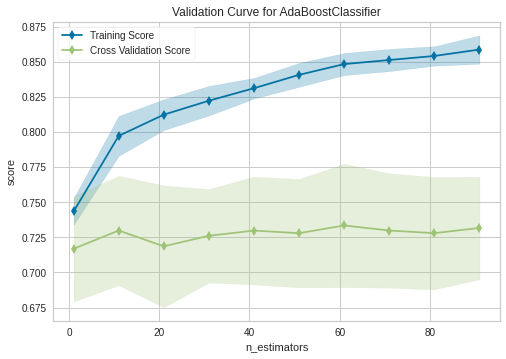

In [14]:
# create a model
adaboost = create_model('ada')
# AUC plot
plot_model(adaboost, plot = 'auc')
# Decision Boundary
plot_model(adaboost, plot = 'boundary')
# Precision Recall Curve
plot_model(adaboost, plot = 'pr')
# Validation Curve
plot_model(adaboost, plot = 'vc')

In [15]:
# create a model
rf = create_model('rf')
# predict test / hold-out dataset
rf_holdout_pred = predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.7143,0.7743,0.4568,0.6271,0.5286,0.3308
